**Introduction**

The Dataset belongs to top Indian bike rental company which offers unique vehicles for the daily commute to reduce traffic. Data contains features like season, weather, temperature, humidity, working day, holiday and total count of bike rented for each hour. 

**Problem Statement**

Performing Univariate and Bi-Variate analysis to understand what factors like season, weather,workingday, holiday are playing major role in increasing/ decreasing bike demand. Also find the factors using hypothesis testing (t-test, anova test, chi-square test) to understand if features like temperature, humidity,windspeed have dependency on demand of bike. Provide Proper recommendations which are actionable to increase demand.

**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from termcolor import colored
from scipy.stats import chi2_contingency # Chi-square test of independence
from scipy.stats import ttest_ind # T-Test for independent samples
from scipy.stats import f_oneway # One-Way Anova Test
from prettytable import PrettyTable

**Reading Data**

In [ ]:
df=pd.read_csv("data.csv")
df.head()
# output is hidden due to organization policy and to manitain confidentiality

In [3]:
df.shape

(10886, 12)

Total Rows-> 10886,
Total Cols->12

In [4]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Only Datetime is of object type, season, holiday, workingday, weather, humidity, casual, registered, and count are of type int, and temp, atemp, windspeed are of type float.

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observations:**

<font color="black">

1. holiday, workingday, season and weather has max values as 1 and 4 and their quartiles are discrete values so these can be converted to categorical type which can be analyzed later.</font>
2. Mean temp is around 20 degree celsius with standard devation as 7, min temp is 0.82 degree Celsius and max temp is 41 degree celsius.
3. Mean feeling temp is around 23 with standard devation as 8.4, min atemp is 0.76 degree Celsius and max temp is 45.4 degree celsius.
4. Mean humidity is around 61 with standard devation as 19, min humidity is 0 and max humidity is 100.
5. Mean windspeed users is around 12.8 with standard devation as 8.1, min windspeed is 0 and max windspeed is 57.As mean value and 75th percentile is too less than max,, with high standard deviation depicting high variance so  **outliers may be present here.**
6. Mean casual users is around 36 with standard devation as 49, min casual is 0 and max casual is 367. As mean value and 75th percentile is too less than max,, with high standard deviation depicting high variance so  **outliers may be present in casual column.**
7. Mean registered is around 155 with standard devation as 151, min registered user is 0 and max registered users are 886. As mean value and 75th percentile is too less than max, with high standard deviation depicting high variance so **outliers may be present here.**
8. Mean count of all users is around 191 with standard devation as 181, min count is 1 and max count is 977.As mean value and 75th percentile is too less than max,, with high standard deviation depicting high variance so **outliers may be present here.**



In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values in the dataset.

In [8]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Balanced proportion of each season are present. 

In [9]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

There are more values with no holidays, only 311 values with holidays are present.

In [10]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

More number of working days are present in datset.

In [11]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

There are more values where weather is clear or partial clouds, fewer values with weather as light snow, light rain and only 1 value with heavy rain, thunderstorm. 

In [12]:
df["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [13]:
print(df["temp"].min())
print(df["temp"].max())

0.82
41.0


Min temperature is 0.82 and max is 41 degree celsius.

In [14]:
df["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [15]:
df["humidity"].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [16]:
df["humidity"].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91])

In [17]:
print(df["humidity"].min())
print(df["humidity"].max())

0
100


In [18]:
df["windspeed"].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [19]:
print(df["windspeed"].min())
print(df["windspeed"].max())

0.0
56.9969


In [ ]:
df["casual"].value_counts()
# output is hidden due to organization policy and to manitain confidentiality

In [21]:
# converting datetime column datatype from object to datetime
df["datetime"]=pd.to_datetime(df["datetime"])

#fetching month, day and hour from datetime to analyze if these features play any role in count of bicycles.

df["month"]=pd.to_datetime(df["datetime"]).dt.month
df["day"]=pd.to_datetime(df["datetime"]).dt.day
df["hour"]=pd.to_datetime(df["datetime"]).dt.hour

In [22]:
# checking correlation between columns if exist

df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.019111,0.380540


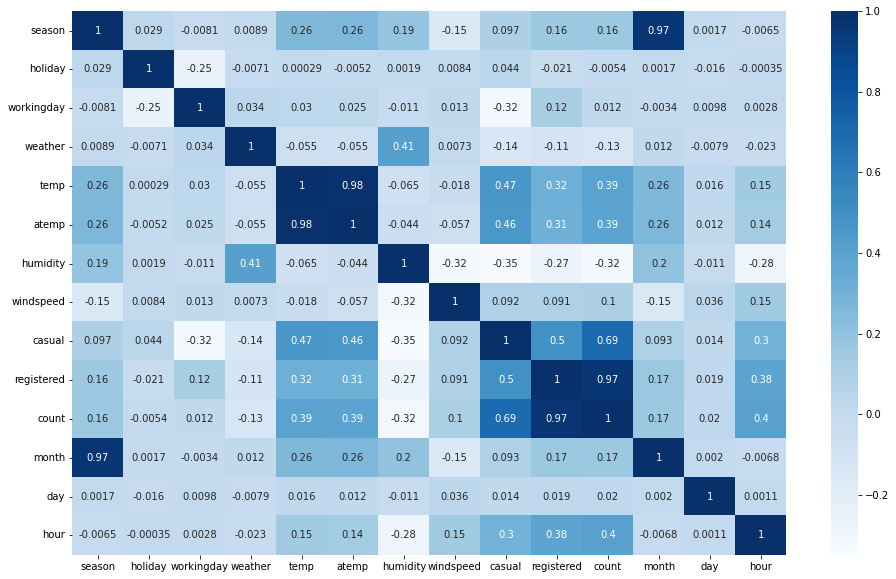

In [23]:
#correlation plot using heatmap

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

**Observations:**

1. casual, registered and count of all users highly correlates with hour, temp, atemp, have negative correlation with weather and holiday.
2. registered users correlates with working day whereas casual and total count have negative and less correlation respectively.
3. holiday is slightly correlated with casual users whereas have negative coorelation with registered and total count.
4. season correlates with registered and total count but have very less correlation with casual users, same is observed with month column.
5. month has extremely correlated with season which is self explainatory,.
6. windspeed is negative correlated with temp and atemp.
7. hour has some correlation with temp, atemp and windspeed but have negative correlation with humidity.

In [24]:
for i in df.columns:
  print(i, ":",df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822
month : 12
day : 19
hour : 24


weather,workingday,holiday,season can be converted to object type as only 2 and 4 discrete values are present, datetime is of datetime type and rest other columns can be integer/float 

In [25]:
df["weather"]=df["weather"].astype("object")
df["workingday"]=df["workingday"].astype("object")
df["holiday"]=df["holiday"].astype("object")
df["season"]=df["season"].astype("object")

In [26]:
#checking datatype for each col

df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month                  int64
day                    int64
hour                   int64
dtype: object

**Univariate Analysis**

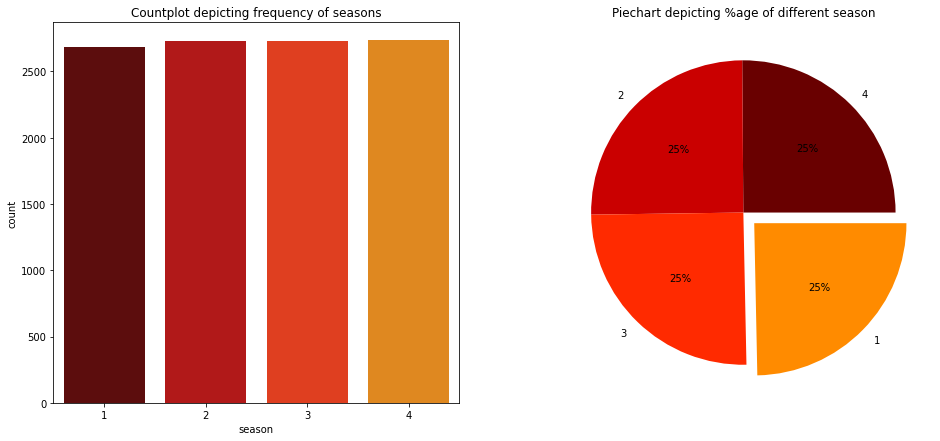

In [27]:
# countplot and piechart for season

plt.figure(figsize=(16,7))
colors=sns.set_palette("hot")

plt.subplot(1,2,1)
sns.countplot(x="season", data=df, palette=colors)
plt.title("Countplot depicting frequency of seasons")

plt.subplot(1,2,2)
plt.pie(df["season"].value_counts(), labels=df["season"].value_counts().index, autopct="%0.0f%%", colors=colors, explode=[0,0,0,0.1])
plt.title("Piechart depicting %age of different season")

plt.show()

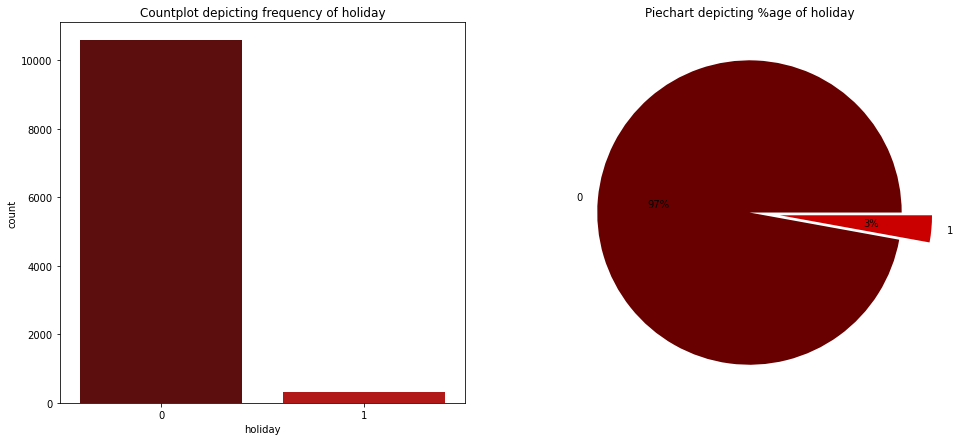

In [28]:
# countplot and piechart for holiday

plt.figure(figsize=(16,7))
colors=sns.set_palette("hot")

plt.subplot(1,2,1)
sns.countplot(x="holiday", data=df, palette=colors)
plt.title("Countplot depicting frequency of holiday")

plt.subplot(1,2,2)
plt.pie(df["holiday"].value_counts(), labels=df["holiday"].value_counts().index, autopct="%0.0f%%", colors=colors, explode=[0,0.2])
plt.title("Piechart depicting %age of holiday")

plt.show()

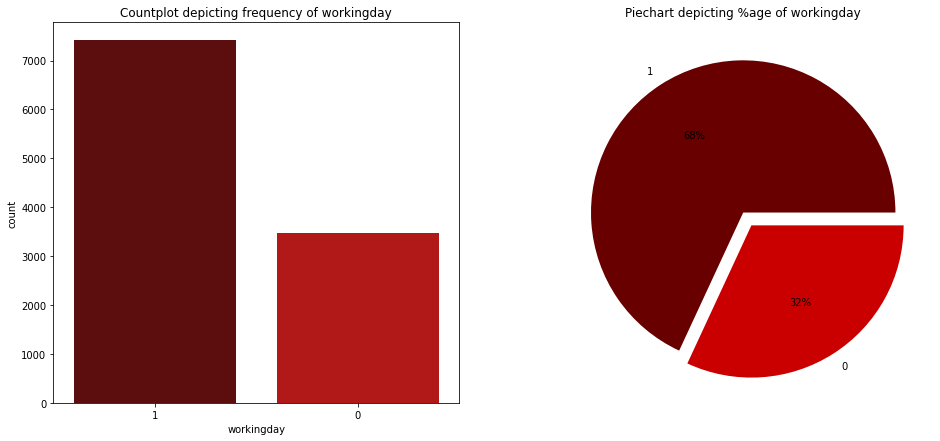

In [29]:
# countplot and piechart for working day

plt.figure(figsize=(16,7))
colors=sns.set_palette("hot")

plt.subplot(1,2,1)
sns.countplot(x="workingday", data=df, order=df["workingday"].value_counts().index, palette=colors)
plt.title("Countplot depicting frequency of workingday")

plt.subplot(1,2,2)
plt.pie(df["workingday"].value_counts(), labels=df["workingday"].value_counts().index, autopct="%0.0f%%", colors=colors, explode=[0,0.1])
plt.title("Piechart depicting %age of workingday")

plt.show()

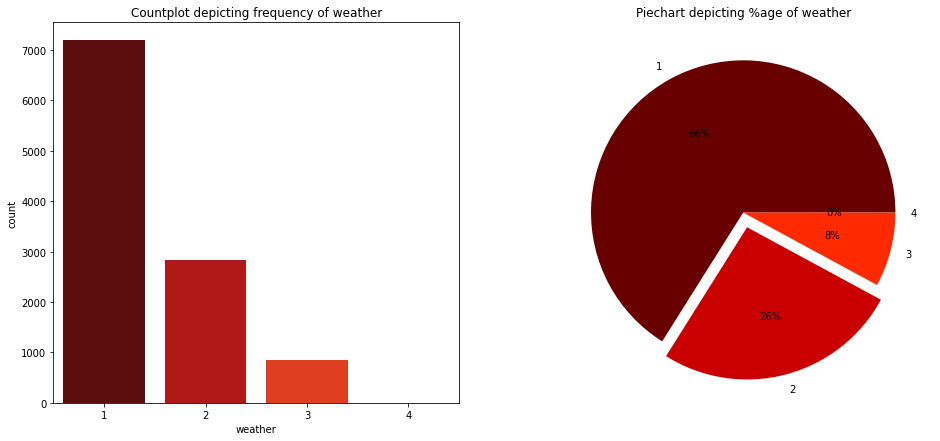

In [30]:
# countplot and piechart for weather

plt.figure(figsize=(16,7))
colors=sns.set_palette("hot")

plt.subplot(1,2,1)
sns.countplot(x="weather", data=df, order=df["weather"].value_counts().index, palette=colors)
plt.title("Countplot depicting frequency of weather")

plt.subplot(1,2,2)
plt.pie(df["weather"].value_counts(), labels=df["weather"].value_counts().index, autopct="%0.0f%%", colors=colors, explode=[0,0.1,0,0])
plt.title("Piechart depicting %age of weather")

plt.show()

**Observations:**

1. Equal proportion of each season are present.
2. 97% values have no holidays.
3. 68% have working days, 32% have either weekend or holiday.
4. 66% values clear weather with partial or no cloud, 26% with mist and broken clouds, 8% with weather as light snow, light rain, with negligble value with heavy rain and thunderstorm.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

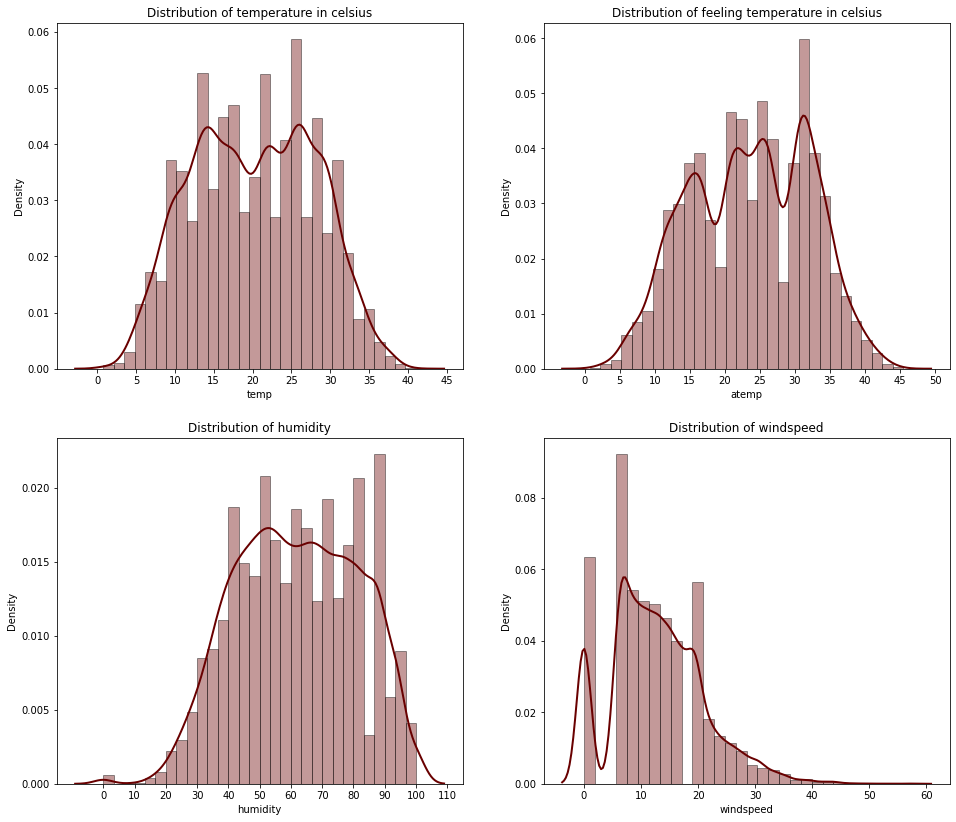

In [31]:
# Distribution plot for continious features temperature, feeling temperature, humidity and windspeed

plt.figure(figsize=(16,14))

plt.subplot(2,2,1)
sns.distplot(df["temp"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.xticks(np.arange(0,50,5))
plt.title("Distribution of temperature in celsius")

plt.subplot(2,2,2)
sns.distplot(df["atemp"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.xticks(np.arange(0,55,5))
plt.title("Distribution of feeling temperature in celsius")


plt.subplot(2,2,3)
sns.distplot(df["humidity"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.xticks(np.arange(0,120,10))
plt.title("Distribution of humidity")


plt.subplot(2,2,4)
sns.distplot(df["windspeed"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.title("Distribution of windspeed")

plt.show()

In [ ]:
# Distribution plot for continuous features casual, registered and total users

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.distplot(df["casual"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.xticks(np.arange(0,450,50))
plt.title("Distribution of casual users")

plt.subplot(2,2,2)
sns.distplot(df["registered"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.xticks(np.arange(0,1100,100))
plt.title("Distribution of registered users")


plt.subplot(2,2,3)
sns.distplot(df["count"], bins=30,hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2})
plt.xticks(np.arange(0,1200,100))
plt.title("Distribution of count of all users")

plt.show()

# output is hidden due to organization policy and to manitain confidentiality

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of count of all users')

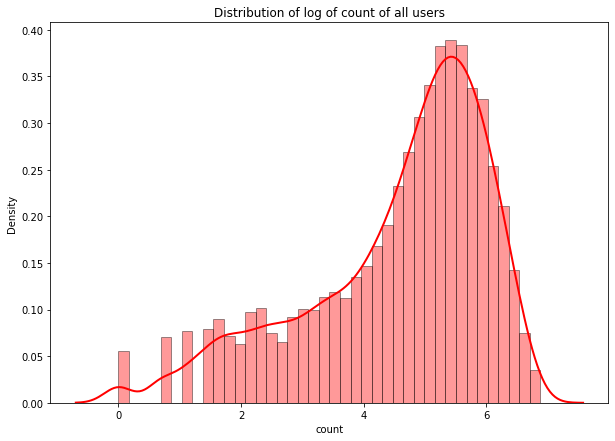

In [33]:
# # Distribution of log normal plot for count of users

plt.figure(figsize=(10,7))
sns.distplot(np.log(df["count"]),hist=True, kde=True, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth":2}, color="red")
plt.title("Distribution of log of count of all users")

**Observations:**

1. There are more values with temperature between 10 and 30 degree celsius somewhat looking like normal distribution.
2. There are more values with feeling temperature between 15 and 35 degree celsius somewhat looking like normal distribution..
3. There are more values with humidity between 40 and 90 somewhat looking like normal distribution..
4. There are more values with windspeed between 9 and 20.
5. There are more values of count of users between 0 to 100 following left skewed log normal distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

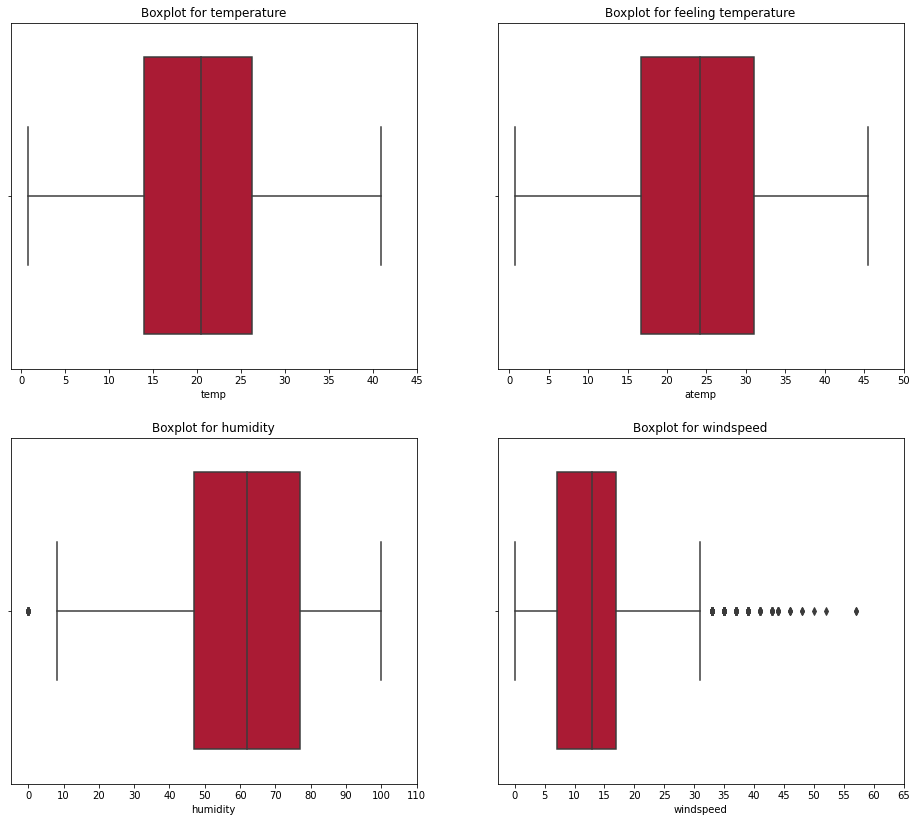

In [34]:
# Boxplot for continuous features temperature, feeling temperature, humidity and windspeed

plt.figure(figsize=(16,14))
colors=sns.set_palette("YlOrRd_r")

plt.subplot(2,2,1)
sns.boxplot(df["temp"], palette=colors)
plt.xticks(np.arange(0,50,5))
plt.title("Boxplot for temperature")

plt.subplot(2,2,2)
sns.boxplot(df["atemp"])
plt.xticks(np.arange(0,55,5))
plt.title("Boxplot for feeling temperature")


plt.subplot(2,2,3)
sns.boxplot(df["humidity"])
plt.xticks(np.arange(0,120,10))
plt.title("Boxplot for humidity")


plt.subplot(2,2,4)
sns.boxplot(df["windspeed"])
plt.xticks(np.arange(0,70,5))
plt.title("Boxplot for windspeed")

plt.show()

There are outliers present in humidity and windspeed. This can be further analysed using IQR.

In [35]:
#calculating quartiles and IQR for humidity
humidity_quartiles=np.percentile(df["humidity"].values,np.arange(0,100,25))
humidity_IQR=humidity_quartiles[3]-humidity_quartiles[1]

print("Inter Quartile Range:", humidity_IQR)

min_value=humidity_quartiles[1] - (1.5 *humidity_IQR)
max_value=humidity_quartiles[3] + (1.5 *humidity_IQR)

print("min value:",min_value)
print("max value:",max_value)

#using stats method:

mean_humidity=df["humidity"].mean()
std_humidity=df["humidity"].std()

# there will be outliers outside mean-3(sigma) and mean+3(sigma)

meanplus_3sigma=round(mean_humidity + (3* std_humidity),2)
meanminus_3sigma=round(mean_humidity - (3* std_humidity),2)


print("min value:",meanminus_3sigma)
print("max value:",meanplus_3sigma)

Inter Quartile Range: 30.0
min value: 2.0
max value: 122.0
min value: 4.15
max value: 119.62


Any value not between 2 and 122 will be considered as outliers.

In [ ]:
# outliers datapoints based on humidity

df[(df["humidity"]<2) | (df["humidity"]> 122)]
# output is hidden due to organization policy and to manitain confidentiality

In [37]:
print("percentage of outliers for humidity:",round(len(df[(df["humidity"]<2) | (df["humidity"]> 122)]) * 100 / len(df),2),"%")

percentage of outliers for humidity: 0.2 %


Above mentioned 22 points will be considered as outliers, as there are less outliers (0.2 %), these can be removed

In [38]:
#calculating quartiles and IQR for windspeed
windspeed_quartiles=np.percentile(df["windspeed"].values,np.arange(0,100,25))
windspeed_IQR=round((windspeed_quartiles[3]-windspeed_quartiles[1]),2)

print("Inter Quartile Range:", windspeed_IQR)

min_value=round(windspeed_quartiles[1] - (1.5 *windspeed_IQR),2)
max_value=round(windspeed_quartiles[3] + (1.5 *windspeed_IQR),2)

print("min value:",min_value)
print("max value:",max_value)

#using stats method:

mean_windspeed=df["windspeed"].mean()
std_windspeed=df["windspeed"].std()

# there will be outliers outside mean-3(sigma) and mean+3(sigma)

meanplus_3sigma=round(mean_windspeed + (3* std_windspeed),2)
meanminus_3sigma=round(mean_windspeed - (3* std_windspeed),2)


print("min value:",meanminus_3sigma)
print("max value:",meanplus_3sigma)

Inter Quartile Range: 10.0
min value: -8.0
max value: 32.0
min value: -11.69
max value: 37.29


Any windspeed value above 32 will be considered as outliers.

In [ ]:
# outliers datapoints based on windspeed

df[df["windspeed"]> 32]
# output is hidden due to organization policy and to manitain confidentiality

In [40]:
print("percentage of outliers for windspeed:",round(len(df[df["windspeed"]> 32]) * 100 / len(df),2),"%")

percentage of outliers for windspeed: 2.09 %


As there are only 2% outliers for windspeed, these can be dropped.

In [ ]:
# Boxplot for continuous features casual, registered and total users

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.boxplot(df["casual"])
plt.title("Boxplot for casual users")

plt.subplot(2,2,2)
sns.boxplot(df["registered"])
plt.xticks(np.arange(0,1100,100))
plt.title("Boxplot for registered users")


plt.subplot(2,2,3)
sns.boxplot(df["count"])
plt.xticks(np.arange(0,1100,100))
plt.title("Boxplot for count of all users")

plt.show()

# output is hidden due to organization policy and to manitain confidentiality

There are outliers present in casual, registered and total count of users.

In [ ]:
#calculating quartiles and IQR for casual, registered and total count of users

casual_quartiles=np.percentile(df["casual"].values,np.arange(0,100,25))
casual_IQR=round((casual_quartiles[3]-casual_quartiles[1]),2)

print("Inter Quartile Range:", casual_IQR)

min_value=round(casual_quartiles[1] - (1.5 *casual_IQR),2)
max_value=round(casual_quartiles[3] + (1.5 *casual_IQR),2)

print("min value for casual users:",min_value)
print("max value for casual users:",max_value)

print("*"*50)

registered_quartiles=np.percentile(df["registered"].values,np.arange(0,100,25))
registered_IQR=round((registered_quartiles[3]-registered_quartiles[1]),2)

print("Inter Quartile Range:", registered_IQR)

min_value=round(registered_quartiles[1] - (1.5 *registered_IQR),2)
max_value=round(registered_quartiles[3] + (1.5 *registered_IQR),2)

print("min value for registered users:",min_value)
print("max value for registered users:",max_value)

print("*"*50)

count_quartiles=np.percentile(df["count"].values,np.arange(0,100,25))
count_IQR=round((count_quartiles[3]-count_quartiles[1]),2)

print("Inter Quartile Range:", count_IQR)

min_value=round(count_quartiles[1] - (1.5 *count_IQR),2)
max_value=round(count_quartiles[3] + (1.5 *count_IQR),2)

print("min value for total count users:",min_value)
print("max value for total count users:",max_value)

# output is hidden due to organization policy and to manitain confidentiality

In [43]:
print("percentage of outliers for casual users:",round(((len(df[df["casual"]>116.5]) * 100 )/len(df)),2),"%")
print("percentage of outliers for registered users:",round(((len(df[df["registered"]>501]) * 100 )/len(df)),2),"%")
print("percentage of outliers for total count users:",round(((len(df[df["count"]>647]) * 100 )/len(df)),2),"%")

percentage of outliers for casual users: 6.88 %
percentage of outliers for registered users: 3.89 %
percentage of outliers for total count users: 2.76 %


**Bi-Variate Analysis**

**Season v/s Count**

In [ ]:
# Boxplot for bivariate analysis between season and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x="season", y="casual",data=df)
plt.title("Boxplot between season and count of casual users")

plt.subplot(1,3,2)
sns.boxplot(x="season", y="registered",data=df)
plt.title("Boxplot between season and count of registered users")

plt.subplot(1,3,3)
sns.boxplot(x="season", y="count",data=df)
plt.title("Boxplot between season and count of total users")

plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Median for season 2 and season 3 is higher for for casual, registered and total users count compared to other 2 season.
2. Median for season 1 and season 4 is higher for registered and total users compared to casual users.
3. Outliers are present for all seasons in all 3 users categories.
4. There are more outliers in season 1 and 4 compared to season 2 and season 3.

In [ ]:
# Barplot for bivariate analysis between season and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x="season", y="casual",data=df)
plt.title("Boxplot between season and count of casual users")

plt.subplot(1,3,2)
sns.barplot(x="season", y="registered",data=df)
plt.title("Boxplot between season and count of registered users")

plt.subplot(1,3,3)
sns.barplot(x="season", y="count",data=df)
plt.title("Boxplot between season and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

1. Mean value is highest for season 3 followed by season 2, season 4 in all 3 categories of users count.
2. season 4 has the lowest mean in all 3 categories count.

**Holiday v/s Count**

In [ ]:
# Boxplot for bivariate analysis between holiday and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x="holiday", y="casual",data=df)
plt.title("Boxplot between holiday and count of casual users")

plt.subplot(1,3,2)
sns.boxplot(x="holiday", y="registered",data=df)
plt.title("Boxplot between holiday and count of registered users")

plt.subplot(1,3,3)
sns.boxplot(x="holiday", y="count",data=df)
plt.title("Boxplot between holiday and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Median value for no holiday and holiday is almost equal for all 3 types of users
2. Days with no holiday has more outliers compared to holiday days.
3. Days when there is holiday, there are more outliers for casual users than registered users, and no outliers in total count.

In [ ]:
# Barplot for bivariate analysis between holiday and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x="holiday", y="casual",data=df)
plt.title("Barplot between holiday and count of casual users")

plt.subplot(1,3,2)
sns.barplot(x="holiday", y="registered",data=df)
plt.title("Barplot between holiday and count of registered users")

plt.subplot(1,3,3)
sns.barplot(x="holiday", y="count",data=df)
plt.title("Barplot between holiday and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Mean count of casual users are more when there is holiday compared to when there is no holiday.
2. Mean count of registered users are less when there is holiday compared to when there is no holiday.
3. Mean count of total users count are almost equal when there is holiday compared to when there is no holiday.

**WorkingDay v/s Count**

In [ ]:
# Boxplot for bivariate analysis between working day and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x="workingday", y="casual",data=df)
plt.title("Boxplot between workingday and count of casual users")

plt.subplot(1,3,2)
sns.boxplot(x="workingday", y="registered",data=df)
plt.title("Boxplot between workingday and count of registered users")

plt.subplot(1,3,3)
sns.boxplot(x="workingday", y="count",data=df)
plt.title("Boxplot between workingday and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. There are less outliers for total count of users in non working day compared to working days.
2. Median value of casual users in working day is slightly less than in non working day but its opposite for registered users.

In [ ]:
# Barplot for bivariate analysis between working day and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x="workingday", y="casual",data=df)
plt.title("Barplot between workingday and count of casual users")

plt.subplot(1,3,2)
sns.barplot(x="workingday", y="registered",data=df)
plt.title("Barplot between workingday and count of registered users")

plt.subplot(1,3,3)
sns.barplot(x="workingday", y="count",data=df)
plt.title("Barplot between workingday and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Mean value of casual users is less for working days than non working days. 
2. Mean value of registered users is more for working days than non working days. 
3. Mean value of total users count is almost equal for working days than non working days. 

**Weather v/s Count**

In [ ]:
# Boxplot for bivariate analysis between weather and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x="weather", y="casual",data=df)
plt.title("Boxplot between weather and count of casual users")

plt.subplot(1,3,2)
sns.boxplot(x="weather", y="registered",data=df)
plt.title("Boxplot between weather and count of registered users")

plt.subplot(1,3,3)
sns.boxplot(x="weather", y="count",data=df)
plt.title("Boxplot between weather and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**
1. Median and all quartiles is highest for season 1 followed by season 2 and 3 for all 3 users categories.
2. season 1 and season 2 has more outliers for casual users compared to registered and total users count.


In [ ]:
# Barplot for bivariate analysis between weather and count of users

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x="weather", y="casual",data=df)
plt.title("Barplot between weather and count of casual users")

plt.subplot(1,3,2)
sns.barplot(x="weather", y="registered",data=df)
plt.title("Barplot between weather and count of registered users")

plt.subplot(1,3,3)
sns.barplot(x="weather", y="count",data=df)
plt.title("Barplot between weather and count of total users")

plt.show()
# output is hidden due to organization policy and to manitain confidentiality

Like median, mean is following same trend i.e mean is highest for season 1 followed by season 2 and 3 for all 3 users categories.

In [ ]:
# lineplot for count of users with numerical features temp, feeling temp, humidity and windspeed

plt.figure(figsize=(18,16))
colors=sns.color_palette("hot")
continuous_variable=["temp","atemp","humidity","windspeed"]

for i in range(len(continuous_variable)):
  plt.subplot(2,2,i+1)
  sns.lineplot(x=continuous_variable[i], y="count", data=df)
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. As temperature increasing from 5 degree celsius to 35 degree celsius, count of users are gradually increasing.
2. As feeling temperature increasing from 0 degree celsius to 40 degree celsius, count of users are increasing.
3. As humidity increasing from 20 to 100 , count of users are gradually decreasing.
4. As windspped increasing from 10 to 20 , count of users are increasing but it starts decreasing when windspped goes above 25, it rises again somewhere at 55, that must be the outlier.

In [53]:
# https://buythermopro.com/knowledge/temperature-vs-feels-like-temperature/#:~:text=The%20air%20temperature%20is%20the,and%20how%20we%20should%20dress.

The air temperature is the actual temperature outside. The feels-like temperature is how the wind or the humidity combined with the air temperature actually feels like on our skin and affects our health and how we should dress.

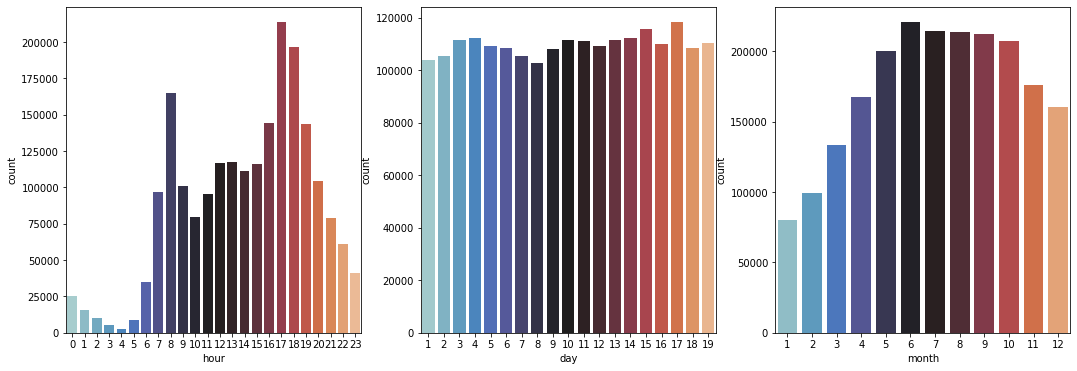

In [54]:
# barplot between count of users and datetime features hour, day and month

duration=["hour","day","month"]
plt.figure(figsize=(18,6))
for i in range(len(duration)):
  temp=df.groupby(duration[i])["count"].sum().reset_index()
  plt.subplot(1,3,i+1)
  sns.barplot(x=duration[i], y="count", data=temp, palette="icefire")
plt.show()

**Observations:**

1. Count of users are high for hour between 7 to 19.
2. Day is not making any significant impact in count of users.
3. Count of users in increasing in first half of year, post jun it slowly starts decreasing.

**MultiVariate Analysis**

In [ ]:
#lineplot between count of users and continuous variables temp, feeling temp, humidity and windspeed for holiday category

continuous_variable=["temp","atemp","humidity","windspeed"]
for i in range(len(continuous_variable)):
  sns.FacetGrid(col="holiday", data=df, height=5, aspect=1.5).map(sns.lineplot, continuous_variable[i],"count")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. Count of users are gradually increasing as temperature is increasing from 5 to 35 for non holiday days, wheras in holiday, there are multiple ups and downs with increasing temperature.
2. Like temp, similar behaviour is observed for feeling temperature.
3. Count of users are gradually decreasing as humidity increasing from 20 to 100 for non holidays, but in holidays, with multiple ups and downs leading to contant count in certain range and then decreasing after 70.
4. With increasing windspeed, count is slowly decreasing with increase in windspeed in non holidays whereas on holidays count of users is somewhat constant in certain range with no proper trend.

In [ ]:
#lineplot between count of users and continuous variables temp, feeling temp, humidity and windspeed for working day category

continuous_variable=["temp","atemp","humidity","windspeed"]
for i in range(len(continuous_variable)):
  sns.FacetGrid(col="workingday", data=df, height=5, aspect=1.5).map(sns.lineplot, continuous_variable[i],"count")
plt.show()

# output is hidden due to organization policy and to manitain confidentiality

**Observations:**
1. Count of users are gradually increasing as temperature is increasing for both working and non working days but has high slope in non-working days.
2. Like temp, similar behaviour is observed for feeling temperature.
3. Count of users are gradually decreasing as humidity increasing for both working and non working days.
4. With increasing windspeed, count is constant upto certain range and then slowly decreasing with no proper trend.

In [ ]:
#lineplot between count of users and continuous variables temp, feeling temp, humidity and windspeed for season category

continuous_variable=["temp","atemp","humidity","windspeed"]
for i in range(len(continuous_variable)):
  sns.FacetGrid(col="season", data=df, height=5, aspect=1.5).map(sns.lineplot, continuous_variable[i],"count")
plt.show()
# output is hidden due to organization policy and to manitain confidentiality

**Observations:**

1. With increasing temperature in season 1, count of users are increasing, whereas in season 2 , till temperature somewhere around 32, count is increasing and then it starts decreasing, in season 3 count of users is increasing but there is no proper trend, in season 4 count is constantly increasing.
2. Like temp, similar behaviour is observed for feeling temperature.
3. With increasing humidity, in season 2 and 4, count is constantly decreasing but in season 1 and season 2, it is constant upto certain range then very slowly decreasing.
4. With increasing windspeed, count of users seems to be constant for season 1 and season2, in season 3 and 4, it is constant but a spike was observed between 30 to 40 windspeed.


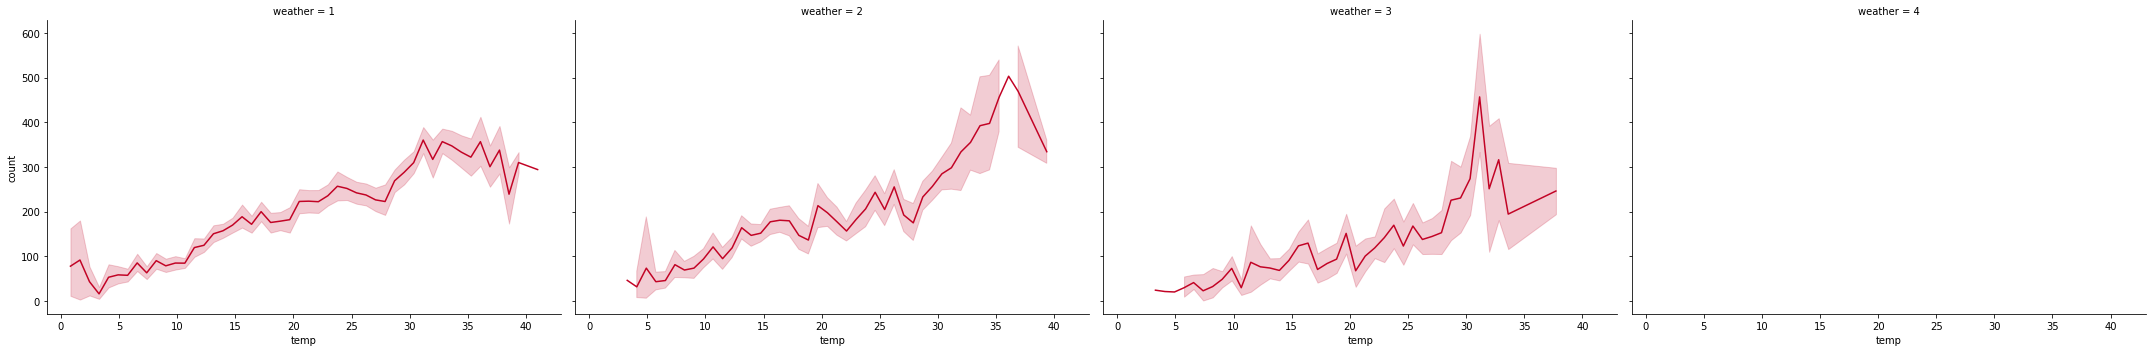

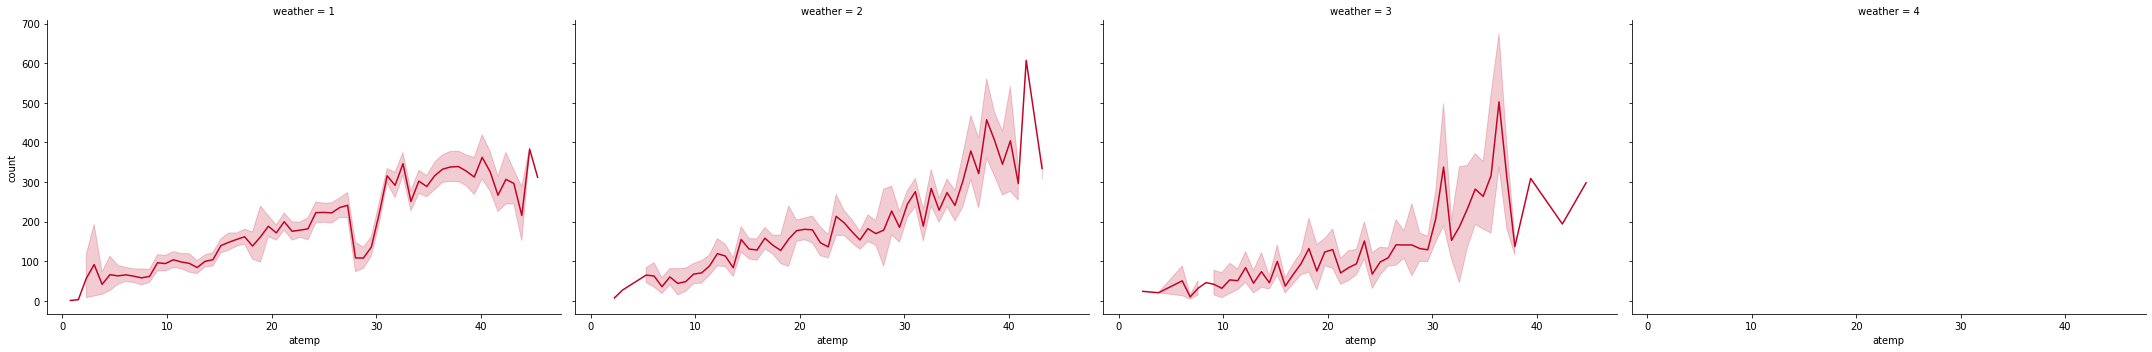

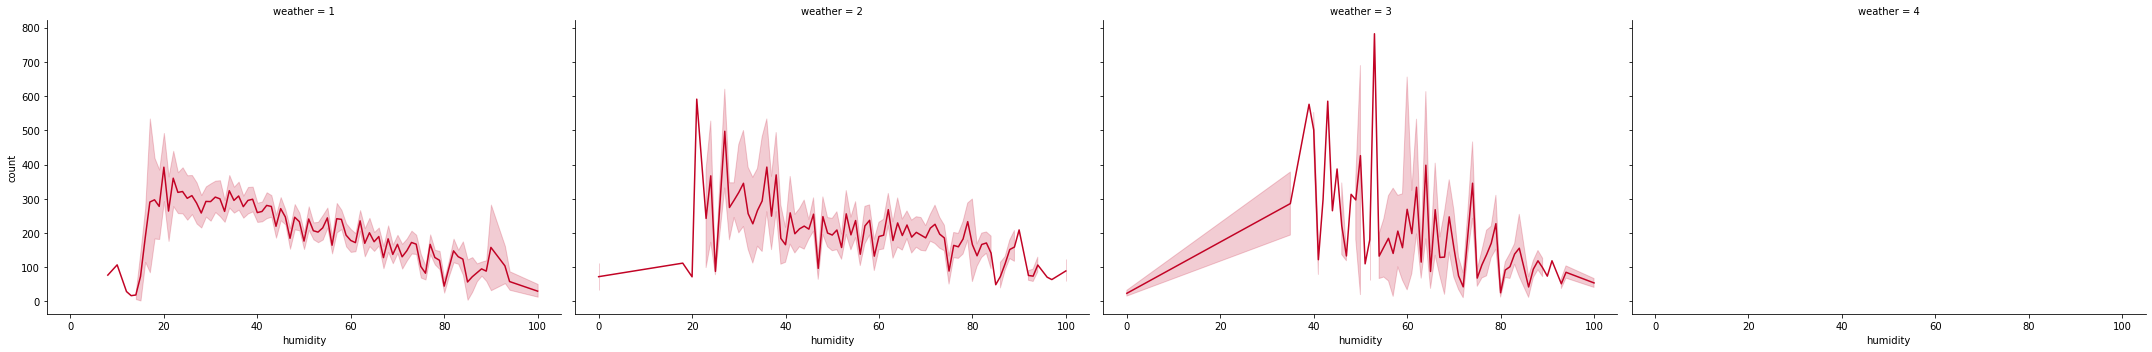

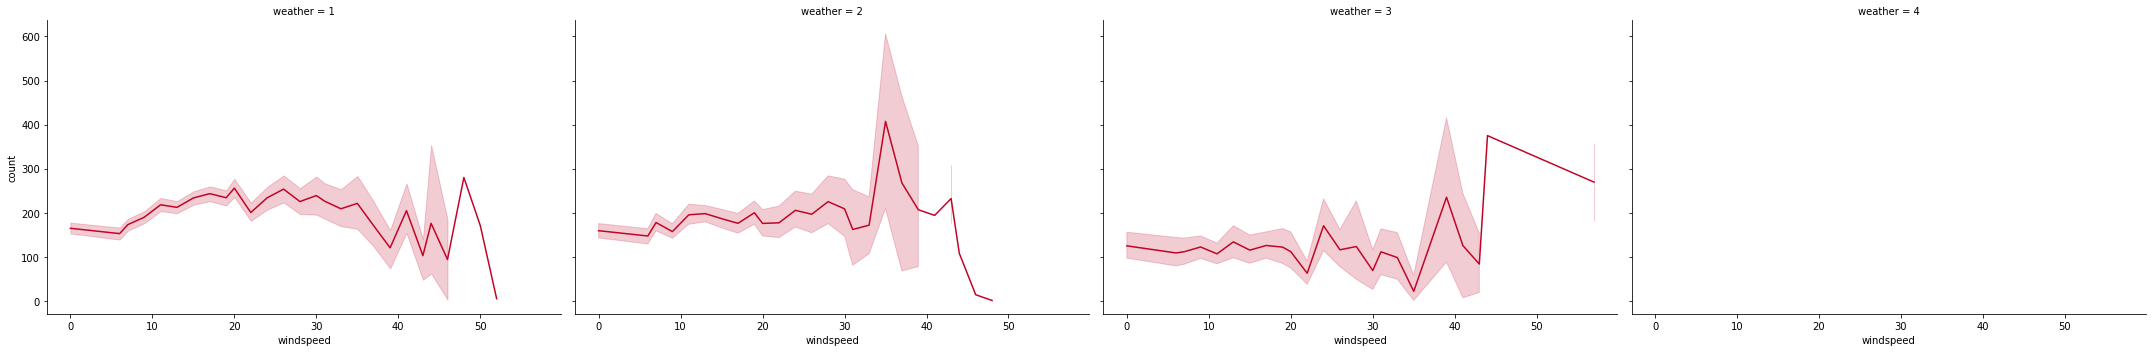

In [58]:
#lineplot between count of users and continuous variables temp, feeling temp, humidity and windspeed for weather category

continuous_variable=["temp","atemp","humidity","windspeed"]
for i in range(len(continuous_variable)):
  sns.FacetGrid(col="weather", data=df, height=5, aspect=1.5).map(sns.lineplot, continuous_variable[i],"count")
plt.show()

**Observations:**

1. With increasing temperature, count of users are gradually increasing, in all weather conditions, have some slight difference in slope.
2. Like temp, similar behaviour is observed for feeling temperature.
3. With increasing humidity, in weather category 1, count of users is gradually decreasing, in  category 2, it is slowly decreasing, whereas in weather category 3, it is increasing linearly till 35 and starts decreasing slowly.
4. With increasing windspeed, count of users doesnt seems to have any proper trend for all weather categories.

In [ ]:
#pairplot among numerical features

sns.pairplot(df)
# output is hidden due to organization policy and to manitain confidentiality

##**Hypothesis Testing**

**2 Sample T-Test**

In [60]:
# H0: working day and count are independent
# Ha: working day and count are dependent
# significance level : 0.05

nonworkingday_count=df[df["workingday"]==0]["count"]
workingday_count=df[df["workingday"]==1]["count"]
alpha=0.05
value=ttest_ind(nonworkingday_count,workingday_count)

ttest_statistic_workingday_count=value[0]
p_value_workingday_count=value[1]

print("ttest_statistic:",ttest_statistic_workingday_count)
print("p value:",p_value_workingday_count)

print("*"*50)

if (p_value_workingday_count>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

ttest_statistic: -1.2096277376026694
p value: 0.22644804226361348
**************************************************
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.


As p value is greater than significance level , we fail to reject null hypothesis, i.e working day and count are independent.

In [61]:
# H0: working day and no of casual users are independent
# Ha: working day and no of casual users are dependent
# significance level : 0.05


nonworkingday_casual=df[df["workingday"]==0]["casual"]
workingday_casual=df[df["workingday"]==1]["casual"]

alpha=0.05
value=ttest_ind(nonworkingday_casual, workingday_casual)

ttest_statistic_workingday_casual=value[0]
p_value_workingday_casual=value[1]

print("ttest_statistic:",ttest_statistic_workingday_casual)
print("p value:",p_value_workingday_casual)

print("*"*50)

if (p_value_workingday_casual>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")


ttest_statistic: 35.12830185964087
p value: 3.56196742360544e-256
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is very less, we reject null hypothesis, i.e working day and casual are dependent

In [62]:
# H0: working day and no of registered users are independent
# Ha: working day and no of registered users are dependent
# significance level : 0.05

nonworkingday_registered=df[df["workingday"]==0]["registered"]
workingday_registered=df[df["workingday"]==1]["registered"]
alpha=0.05
value=ttest_ind(nonworkingday_registered, workingday_registered)

ttest_statistic_workingday_registered=value[0]
p_value_workingday_registered=value[1]

print("ttest_statistic:",ttest_statistic_workingday_registered)
print("p value:",p_value_workingday_registered)

print("*"*50)

if (p_value_workingday_registered>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")


ttest_statistic: -12.552707000266874
p value: 6.806493719916074e-36
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is very less, we reject null hypothesis, i.e working day and registered users count are dependent

In [63]:
# H0: holiday and count are independent
# Ha: holiday and count are dependent
# significance level : 0.05

nonholiday_count=df[df["holiday"]==0]["count"]
holiday_count=df[df["holiday"]==1]["count"]

alpha=0.05
value=ttest_ind(nonholiday_count, holiday_count)

ttest_statistic_holiday_count=value[0]
p_value_holiday_count=value[1]

print("ttest_statistic:",ttest_statistic_holiday_count)
print("p value:",p_value_holiday_count)

print("*"*50)

if (p_value_holiday_count>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")


ttest_statistic: 0.5626388963477119
p value: 0.5736923883271103
**************************************************
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.


As p value is greater than significance level, we fail to reject null hypothesis, i.e holiday and count are independent

In [64]:
table=PrettyTable(["feature","t-test","test statistic","p value"])
table.add_row(["working day","casual users",ttest_statistic_workingday_casual,p_value_workingday_casual])
table.add_row(["working day","registered users",ttest_statistic_workingday_registered,p_value_workingday_registered])
table.add_row(["working day","total count",ttest_statistic_workingday_count,p_value_workingday_count])
table.add_row(["Holiday","total count",ttest_statistic_holiday_count,p_value_holiday_count])
print(colored("T-Test for working day and Holiday:",color="blue"))
print(table)

T-Test for working day and Holiday:
+-------------+------------------+---------------------+-----------------------+
|   feature   |      t-test      |    test statistic   |        p value        |
+-------------+------------------+---------------------+-----------------------+
| working day |   casual users   |  35.12830185964087  | 3.56196742360544e-256 |
| working day | registered users | -12.552707000266874 | 6.806493719916074e-36 |
| working day |   total count    | -1.2096277376026694 |  0.22644804226361348  |
|   Holiday   |   total count    |  0.5626388963477119 |   0.5736923883271103  |
+-------------+------------------+---------------------+-----------------------+


**Anova Test:**

In [65]:
# H0: weather and count are independent
# Ha: weather and count are dependent
# significance level : 0.05

weather_1count=df[df["weather"]==1]["count"]
weather_2count=df[df["weather"]==2]["count"]
weather_3count=df[df["weather"]==3]["count"]
weather_4count=df[df["weather"]==4]["count"]

value=f_oneway(weather_1count,weather_2count,weather_3count,weather_4count)
anova_statistic_weather=value[0]
p_value_weather=value[1]

print("anova_statistic:",anova_statistic_weather)
print("p value:",p_value_weather)

print("*"*50)

if (p_value_weather>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

anova_statistic: 65.53024112793271
p value: 5.482069475935669e-42
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is less than significance value,reject null hypothesis i.e, weather and count are dependent.

In [66]:
# H0: season and count are independent
# Ha: season and count are dependent
# significance level : 0.05

season_1count=df[df["season"]==1]["count"]
season_2count=df[df["season"]==2]["count"]
season_3count=df[df["season"]==3]["count"]
season_4count=df[df["season"]==4]["count"]

value=f_oneway(season_1count,season_2count,season_3count,season_4count)
anova_statistic_season=value[0]
p_value_season=value[1]

print("anova_statistic:",anova_statistic_season)
print("p value:",p_value_season)

print("*"*50)

if (p_value_season>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

anova_statistic: 236.94671081032106
p value: 6.164843386499654e-149
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is less than significance value,reject null hypothesis i.e, season and count are dependent.

In [67]:
table=PrettyTable(["Anova-test","test statistic","p value"])
table.add_row(["weather",anova_statistic_weather,p_value_weather])
table.add_row(["season",anova_statistic_season,p_value_season])
print(colored("Anova Test for weather and season:", color="blue"))
print(table)

Anova Test for weather and season:
+------------+--------------------+------------------------+
| Anova-test |   test statistic   |        p value         |
+------------+--------------------+------------------------+
|  weather   | 65.53024112793271  | 5.482069475935669e-42  |
|   season   | 236.94671081032106 | 6.164843386499654e-149 |
+------------+--------------------+------------------------+


**Chi-Square Test**

In [68]:
# check if Weather is dependent on the season 

weather_season_table=pd.crosstab(df["weather"],df["season"])

weather_season_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [69]:
# H0: weather and season are independent
# Ha: weather and season are dependent
# significance level : 0.05

from scipy.stats.contingency import chi2_contingency

alpha=0.05
value=chi2_contingency(weather_season_table)

chi_sqr_statistic_weather_season=value[0]
p_value_weather_season=value[1]
dof=value[2]
expected_value=value[3]

print("chi_sqr_statistic:", chi_sqr_statistic_weather_season)
print("p_value:",p_value_weather_season)
print("expected_value:",expected_value)

print("*"*50)

if (p_value_weather_season>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

chi_sqr_statistic: 49.15865559689363
p_value: 1.5499250736864862e-07
expected_value: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is less, we reject null hypothesis, i.e weather and season are dependent.

In [70]:
bins=[0,15,30,35,40]
groups=["cold", "Normal", "Warm", "Hot"]

df["temp_bins"]=pd.cut(df["temp"], bins, labels=groups)


In [71]:
weather_temp_bins_table=pd.crosstab(df["weather"], df["temp_bins"])

weather_temp_bins_table
# output is hidden due to organization policy and to manitain confidentiality

temp_bins,cold,Normal,Warm,Hot
weather,,,,
1,2210,3978,833,170
2,927,1700,187,20
3,255,571,31,2
4,1,0,0,0


In [72]:
# H0: weather and temperature are independent
# Ha: weather and temperature are dependent
# significance level : 0.05

alpha=0.05
value=chi2_contingency(weather_temp_bins_table)

chi_sqr_statistic_weather_temp=value[0]
p_value_weather_temp=value[1]
dof=value[2]
expected_value=value[3]

print("chi_sqr_statistic:", chi_sqr_statistic_weather_temp)
print("p_value:",p_value_weather_temp)
print("expected_value:",expected_value)

print("*"*50)

if (p_value_weather_temp>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

chi_sqr_statistic: 158.19771312162825
p_value: 1.7585336932587753e-29
expected_value: [[2.24153082e+03 4.12830124e+03 6.94326229e+02 1.26841709e+02]
 [8.83395682e+02 1.62697896e+03 2.73636564e+02 4.99887919e+01]
 [2.67761782e+02 4.93145705e+02 8.29406523e+01 1.51518604e+01]
 [3.11713367e-01 5.74092788e-01 9.65548921e-02 1.76389527e-02]]
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is less than significance value,reject null hypothesis i.e weather and temperature are dependent.

In [73]:
bins=[0,15,30,35,40]
groups=["cold", "Normal", "Warm", "Hot"]

df["atemp_bins"]=pd.cut(df["atemp"], bins, labels=groups)

In [74]:
bins=[0,30,60,100]
groups=["Low","Normal","High"]

df["humidity_bins"]=pd.cut(df["humidity"], bins, labels=groups)

In [75]:
humidity_atemp_bins_table=pd.crosstab(df["humidity_bins"], df["atemp_bins"])

humidity_atemp_bins_table

atemp_bins,cold,Normal,Warm,Hot
humidity_bins,,,,
Low,50,239,129,39
Normal,1121,1853,1177,431
High,791,3560,1157,168


In [76]:
# H0: Humidity and feeling temperature are independent
# Ha: Humidity and feeling temperature are dependent
# significance level : 0.05

alpha=0.05
value=chi2_contingency(humidity_atemp_bins_table)

chi_sqr_statistic_humidity_atemp=value[0]
p_value_humidity_atemp=value[1]
dof=value[2]
expected_value=value[3]

print("chi_sqr_statistic:", chi_sqr_statistic_humidity_atemp)
print("p_value:",p_value_humidity_atemp)
print("expected_value:",expected_value)

print("*"*50)

if (p_value_humidity_atemp>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

chi_sqr_statistic: 625.2821003885994
p_value: 8.195157454198452e-132
expected_value: [[  83.68026132  241.0605693   105.04815679   27.2110126 ]
 [ 838.99990667 2416.93551097 1053.239944    272.82463836]
 [1039.31983201 2994.00391974 1304.71189921  337.96434904]]
**************************************************
As p value is less than significance value,reject null hypothesis


As p value is less than significance value,reject null hypothesis i.e Humidity and feeling temperature are dependent.

In [77]:
bins=[0,15,30,60]
groups=["Low", "Normal","High"]

df["windspeed_bins"]=pd.cut(df["windspeed"], bins, labels=groups)

In [78]:
windspeed_atemp_bins_table=pd.crosstab(df["windspeed_bins"],df["atemp_bins"])
windspeed_atemp_bins_table

atemp_bins,cold,Normal,Warm,Hot
windspeed_bins,,,,
Low,884,2670,1235,287
Normal,770,2019,880,272
High,140,190,76,17


In [79]:
# H0: windspeed and feeling temperature are independent
# Ha: windspeed and feeling temperature are dependent
# significance level : 0.05

alpha=0.05
value=chi2_contingency(windspeed_atemp_bins_table)

chi_sqr_statistic_weather_atemp=value[0]
p_value_weather_atemp=value[1]
dof=value[2]
expected_value=value[3]

print("chi_sqr_statistic:", chi_sqr_statistic_weather_atemp)
print("p_value:",p_value_weather_atemp)
print("expected_value:",expected_value)

print("*"*50)

if (p_value_weather_atemp>alpha):
  print("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.")
else:
  print("As p value is less than significance value,reject null hypothesis")

chi_sqr_statistic: 74.14981973283274
p_value: 5.742730985594373e-14
expected_value: [[ 964.65508475 2623.49618644 1178.12669492  309.7220339 ]
 [ 748.95699153 2036.87913136  914.69608051  240.46779661]
 [  80.38792373  218.6246822    98.17722458   25.81016949]]
**************************************************
As p value is less than significance value,reject null hypothesis


windspeed and feeling temperature are dependent.

In [80]:
table=PrettyTable(["Chi-Square-test","test statistic","p value"])
table.add_row(["weather v/s season",chi_sqr_statistic_weather_season,p_value_weather_season])
table.add_row(["weather v/s temp",chi_sqr_statistic_weather_temp,p_value_weather_temp])
table.add_row(["Humidity v/s atemp",chi_sqr_statistic_humidity_atemp,p_value_humidity_atemp])
table.add_row(["weather v/s atemp",chi_sqr_statistic_weather_atemp,p_value_weather_atemp])
print(colored("Chi Square Test between categorical variables:", color="blue"))
print(table)

Chi Square Test between categorical variables:
+--------------------+--------------------+------------------------+
|  Chi-Square-test   |   test statistic   |        p value         |
+--------------------+--------------------+------------------------+
| weather v/s season | 49.15865559689363  | 1.5499250736864862e-07 |
|  weather v/s temp  | 158.19771312162825 | 1.7585336932587753e-29 |
| Humidity v/s atemp | 625.2821003885994  | 8.195157454198452e-132 |
| weather v/s atemp  | 74.14981973283274  | 5.742730985594373e-14  |
+--------------------+--------------------+------------------------+


In [81]:
#H0: categorical variables season, holiday, workingday and weather is not related to count
#Ha: categorical variables season, holiday, workingday and weather is related to count

bins=[0,100,200,300,400]
groups=["less demand", "moderate demand","high demand","very high demand"]

df["count_bins"]=pd.cut(df["count"], bins, labels=groups)
cat_cols=list(df.dtypes[df.dtypes=="O"].index)
alpha=0.05
table=PrettyTable(["Chi-Square-test","test statistic","p value"])
for i in cat_cols:
  contingency_table=pd.crosstab(df[i],df["count_bins"])
  value=chi2_contingency(contingency_table)
  chi_sqr_statistic=value[0]
  p_value=value[1]
  dof=value[2]
  expected_value=value[3]
  print(colored(str(i)+" v/s count:", attrs=["bold", "underline"], color="blue"))
  print("chi_sqr_statistic of",i,":", chi_sqr_statistic)
  print("p_value of ",i,":",p_value)
  print("expected_value of ",i,":",expected_value)
  if (p_value>alpha):
    print(colored("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.", attrs=["bold"], color="blue"))
  else:
    print(colored("As p value is less than significance value,reject null hypothesis", attrs=["bold"], color="blue"))
  print(colored("*"*50, color="red"))

  table.add_row([i,chi_sqr_statistic,p_value])
print(colored("Chi Square Test between categorical variables v/s count:", color="blue",attrs=["bold"]))
print(table)

season v/s count:
chi_sqr_statistic of season : 483.4438522886004
p_value of  season : 2.012662640773258e-98
expected_value of  season : [[1176.07201101  640.20925553  467.38536482  282.33336863]
 [1046.82325532  569.85110664  416.02033252  251.30530552]
 [1019.78184899  555.13078471  405.27374775  244.81361855]
 [1085.32288468  590.80885312  431.32055491  260.5477073 ]]
As p value is less than significance value,reject null hypothesis
**************************************************
holiday v/s count:
chi_sqr_statistic of holiday : 5.016477188171675
p_value of  holiday : 0.17059457207286913
expected_value of  holiday : [[4206.54283596 2289.8832998  1671.73144128 1009.84242296]
 [ 121.45716404   66.1167002    48.26855872   29.15757704]]
As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.
**************************************************
workingday v/s count:
chi_sqr_statistic of workingday : 77.1398398443306
p_value of  workingda

In [82]:
table=PrettyTable(["Chi-Square-test","test statistic","p value"])
table.add_row(["weather v/s season",chi_sqr_statistic_weather_season,p_value_weather_season])
table.add_row(["weather v/s temp",chi_sqr_statistic_weather_temp,p_value_weather_temp])
table.add_row(["Humidity v/s atemp",chi_sqr_statistic_humidity_atemp,p_value_humidity_atemp])
table.add_row(["weather v/s atemp",chi_sqr_statistic_weather_atemp,p_value_weather_atemp])
print(table)

+--------------------+--------------------+------------------------+
|  Chi-Square-test   |   test statistic   |        p value         |
+--------------------+--------------------+------------------------+
| weather v/s season | 49.15865559689363  | 1.5499250736864862e-07 |
|  weather v/s temp  | 158.19771312162825 | 1.7585336932587753e-29 |
| Humidity v/s atemp | 625.2821003885994  | 8.195157454198452e-132 |
| weather v/s atemp  | 74.14981973283274  | 5.742730985594373e-14  |
+--------------------+--------------------+------------------------+


p value is less for season, workingday and weather so these are related to count of bicycles, same can be observed in correlation graph.

p valus is high for holiday so holiday is not related to count.

In [83]:
#H0: numerical variables temp,atemp, humidity and windspeed is not related to count
#H0: numerical variables temp,atemp, humidity and windspeed is related to count

bins=[0,100,200,300,400]
groups=["less demand", "moderate demand","high demand","very high demand"]

df["count_bins"]=pd.cut(df["count"], bins, labels=groups)
category_cols=list(df.dtypes[(df.dtypes=="category") & (df.dtypes.index!="count_bins")].index)
alpha=0.05
table=PrettyTable(["Chi-Square-test","test statistic","p value"])

for i in category_cols:
  contingency_table=pd.crosstab(df[i],df["count_bins"])
  value=chi2_contingency(contingency_table)
  chi_sqr_statistic=value[0]
  p_value=value[1]
  dof=value[2]
  expected_value=value[3]
  print(colored(str(i)+" v/s count:", attrs=["bold", "underline"], color="blue"))
  print("chi_sqr_statistic of",i,":", chi_sqr_statistic)
  print("p_value of ",i,":",p_value)
  print("expected_value of ",i,":",expected_value)
  if (p_value>alpha):
    print(colored("As p value is greater than significance value, fail to reject null hypothesis i.e accept null hypothesis.", attrs=["bold"], color="blue"))
  else:
    print(colored("As p value is less than significance value,reject null hypothesis", attrs=["bold"], color="blue"))
  print(colored("*"*50, color="red"))
  table.add_row([i,chi_sqr_statistic,p_value])
print(colored("Chi Square Test between numerical variables v/s count:", color="blue",attrs=["bold"]))
print(table)

temp_bins v/s count:
chi_sqr_statistic of temp_bins : 1136.0796927217534
p_value of  temp_bins : 7.599591077054548e-239
expected_value of  temp_bins : [[1502.10294429  817.68820165  596.60696886  360.60188519]
 [2433.98432535 1324.96928617  966.73268375  584.31370472]
 [ 333.24041517  181.4035162   132.35681      79.99925863]
 [  58.67231519   31.93899598   23.30353739   14.08515145]]
As p value is less than significance value,reject null hypothesis
**************************************************
atemp_bins v/s count:
chi_sqr_statistic of atemp_bins : 1251.572337771883
p_value of  atemp_bins : 8.887886672572893e-264
expected_value of  atemp_bins : [[ 886.04261242  474.56327623  345.32312634  207.07098501]
 [2372.35246253 1270.62890792  924.59229122  554.42633833]
 [ 861.49464668  461.41541756  335.75588865  201.33404711]
 [ 206.11027837  110.39239829   80.32869379   48.16862955]]
As p value is less than significance value,reject null hypothesis
**************************************

p value is less for temp,atemp, humidity and windspeed, so all these variables are related to count.

**Business Insights:**

1. Compared to the winter and spring seasons, more people choose to rent bicycles during seasons 2 and 3, which are summer and fall.
2. Casual customers prefer to rent bicycles during holidays, whereas registered users prefer to rent them on non-holiday days.
3. Similar to how we've seen that casual users are more inclined to rent bicycles on vacations, there are less informal users renting on working days while the number of registered users is higher on working days.
4. When the weather is clear or partially overcast, users prefer to rent bikes. When it was raining, snowing, or thundering, relatively few bikes were rented. 
5. The number of people renting bikes likewise increases when the temperature rises from 5 degrees. But a lot fewer bicycles were hired when the temperature was below 5.
6. Number of users renting bikes decreases steadily from 300 to 50 when humidity rises from 20. However, the number of bicycles rented at relatively low rates when the relative humidity was below 20.
7. Between 150 and 200 bicycles are hired as the wind speed increases up to 40 mph, but this number drops as the wind speed rises over 40 mph.
8. More bicycles were hired in the first half of the year, and the busiest hours are from 7 to 19 hours daily.
9. According to t test, 
	a.) Working day is dependent on the number of casual and registered users, but not on the overall number of users.
	b.) Holiday and count are independent
10. According to Anova test,
	a.) weather and count are dependent
	b.) season and count are dependent
11. According to Chi-Square test,
	a.) weather and season are dependent
	b.) weather and temperature are dependent.
	c.) Humidity and feeling temperature are dependent.
	d.) windspeed and feeling temperature are dependent.
12. Holidays have high p values than significance value, therefore count is unrelated to them.
13. All of these factors are connected to count since the p value for temperature, atemp, humidity, and windspeed is lower.

**Recommendations:**

1. There will be increased demand for bicycles in seasons 2 and 3, which are the summer and fall seasons, therefore there should be more inventory.
2. Demand decreases as temperature rises, but as demand increases as temperature rises, stock should increase as well.
3. When the wind speed exceeds 40, there should be less supply because demand is lower.
4. Demand decreases when humidity rises over 20, while demand peaks between 20 and 25 and is extremely low below 20, thus stock placement should be done accordingly.
5. Demand is at its highest from 7 to 19 hours, so more supply should be available then. It is also at its highest in the first six months of the year, so more stock should be available then.